# Stresses in a disk with diametrally opposite forces

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
init_session()

IPython console for SymPy 1.4 (Python 3.6.9-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



The stress function for a disk of diameter $d$ with center in the origin, and radial inward and opposite forces $P$ placed at $(0, d/2)$ and $(0, -d/2)$ is given by

$$\phi = x\arctan\left[\frac{x}{d/2 - y}\right] + x\arctan\left[\frac{x}{d/2 + y}\right] + \frac{P}{\pi d}(x^2 + y^2)$$

We know that the stresses are given by

\begin{align}
\sigma_{xx} = \frac{\partial^2 \phi}{\partial x^2}\\
\sigma_{yy} = \frac{\partial^2 \phi}{\partial y^2}\\
\sigma_{xy} = -\frac{\partial^2 \phi}{\partial x \partial y}
\end{align}

In [3]:
d, P = symbols("d P", positive=True)

In [4]:
phi = x*atan(x/(d/2 - y)) + x*atan(x/(d/2 + y)) + P/(pi*d)*(x**2 + y**2)

In [5]:
Sxx = phi.diff(y, 2)
Syy = phi.diff(x, 2)
Sxy = -phi.diff(x, 1, y, 1)

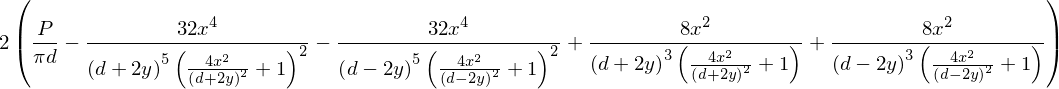

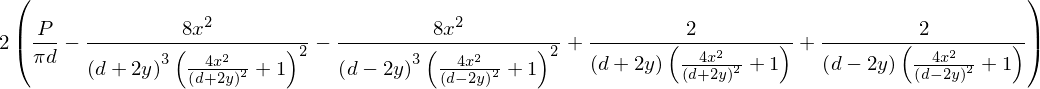

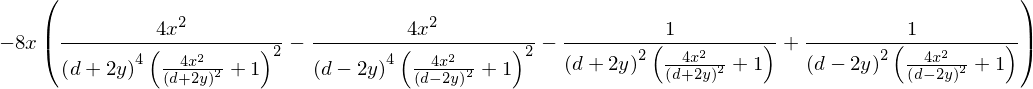

In [6]:
display(Sxx)
display(Syy)
display(Sxy)

In [7]:
Sxx_fun = lambdify((x, y), Sxx.subs({P:1, d:2}), numpy)
Syy_fun = lambdify((x, y), Syy.subs({P:1, d:2}), numpy)
Sxy_fun = lambdify((x, y), Sxy.subs({P:1, d:2}), numpy)

In [8]:
theta, r = np.mgrid[0:2*np.pi:101j, 1e-6:1:101j]

In [9]:
xx = r*np.cos(theta)
yy = r*np.sin(theta)

In [10]:
Sxx_vec = Sxx_fun(xx, yy)
Syy_vec = Syy_fun(xx, yy)
Sxy_vec = Sxy_fun(xx, yy)

/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: invalid value encountered in multiply
  NumPy
/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  NumPy
/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: invalid value encountered in multiply
  NumPy
/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  NumPy
/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: invalid value encountered in multiply
  NumPy
/home/nguarinz/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  NumPy


In [11]:
plt.figure()
plt.contourf(xx, yy, Sxx_vec, cmap="RdYlGn", vmin=-12, vmax=12)
plt.colorbar()
plt.axis("square");

<IPython.core.display.Javascript object>

In [12]:
plt.figure()
plt.contourf(xx, yy, Syy_vec, cmap="RdYlGn", vmin=-210, vmax=210)
plt.colorbar()
plt.axis("square");

<IPython.core.display.Javascript object>

In [13]:
plt.figure()
plt.contourf(xx, yy, Sxy_vec, cmap="RdYlGn")
plt.colorbar()
plt.axis("square");

<IPython.core.display.Javascript object>

## Strains

In [14]:
E, nu = symbols("E nu")
G = E/(2*(1 + nu))

In [15]:
Exx = simplify(1/E*(Sxx - nu*Syy))
Eyy = simplify(1/E*(Syy - nu*Sxx))
Exy = simplify(1/G*Sxy)

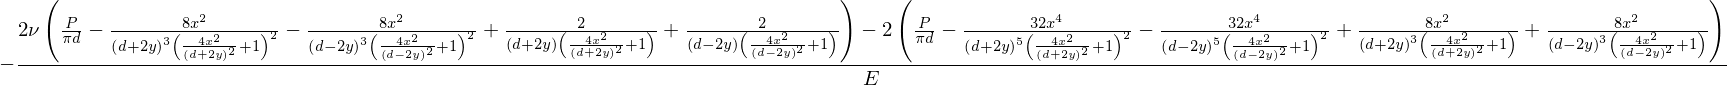

In [16]:
display(Exx)

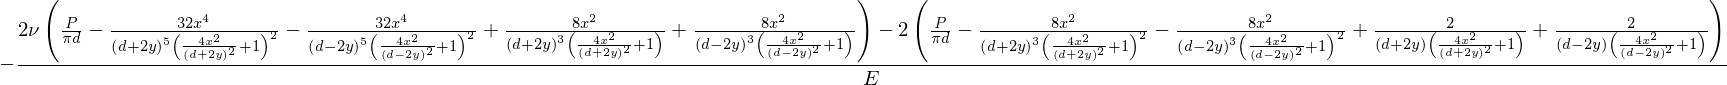

In [17]:
display(Eyy)


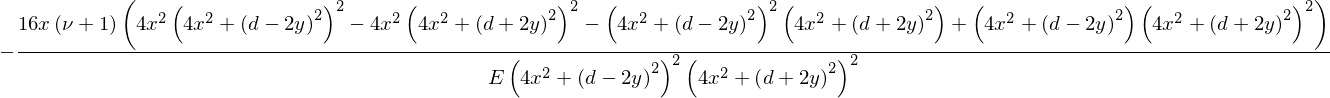

In [18]:
display(Exy)

## Displacements

In [19]:
C1, a, b = symbols("C1 a b")

In [20]:
ux, uy = symbols("ux uy", cls=Function)

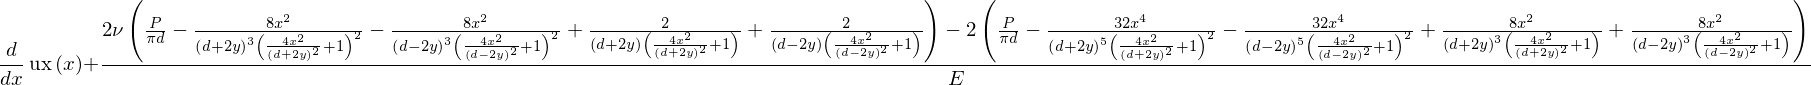

In [21]:
eq1 = diff(ux(x), x) - Exx
eq1

In [23]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()